#  Music Analysis & Song Recommendation System

## Framing the Problem
This project is aimed upon building a "*Music Analysis system & Song Recommendation System*" which analyse the type of music according to the data provided like acousticness, loudness , tempo etc. and also gives the user recommendations on songs based on his music taste by analysing his previously heard songs and playlists.

## Importing necessary Libraries

In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [57]:
data = pd.read_csv("data/data_o.csv")
genre_data = pd.read_csv('data/data_by_genres_o.csv')
artist_data = pd.read_csv('data/data_by_artist_o.csv')
artist = pd.read_csv('data/artists.csv')
tracks = pd.read_csv('data/tracks.csv')
top50 = pd.read_csv('data/top50.csv')

## Read Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [6]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [7]:
artist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [8]:
artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB


In [9]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [10]:
top50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


## Data Cleaning 

In [55]:
data.isnull()
data.duplicated().sum()

0

In [56]:
genre_data.isnull()
genre_data.duplicated().sum()

0

In [60]:
artist_data.isnull()
artist_data.duplicated().sum()

0

In [62]:
artist.isnull()
artist.duplicated().sum()

0

In [63]:
tracks.isnull()
tracks.duplicated().sum()

0

In [64]:
top50.isnull()
top50.duplicated().sum()

0

## We are checking for  the analysis with the target as 'popularity'. Before doing that let's check for the Feature Correlation by considering a few features and for that, I'm going to use the yellowbrick package..

FeatureCorrelation(ax=<AxesSubplot:>,
                   labels=array(['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence',
       'duration_ms', 'explicit', 'key', 'mode', 'year'], dtype='<U16'))

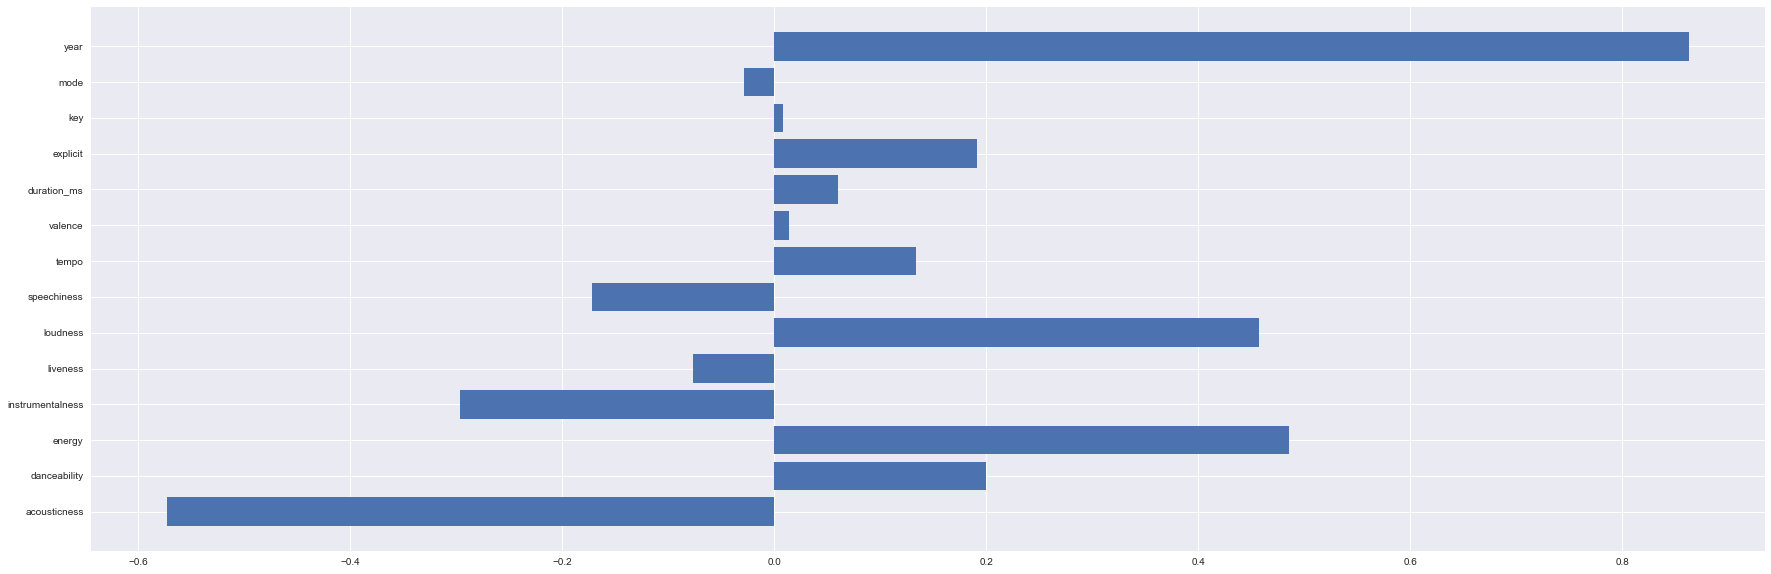

In [58]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(30,10)
visualizer.fit(X, y) 

## Exploratory Data Analisys

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [02:04<00:00,  9.55s/it]


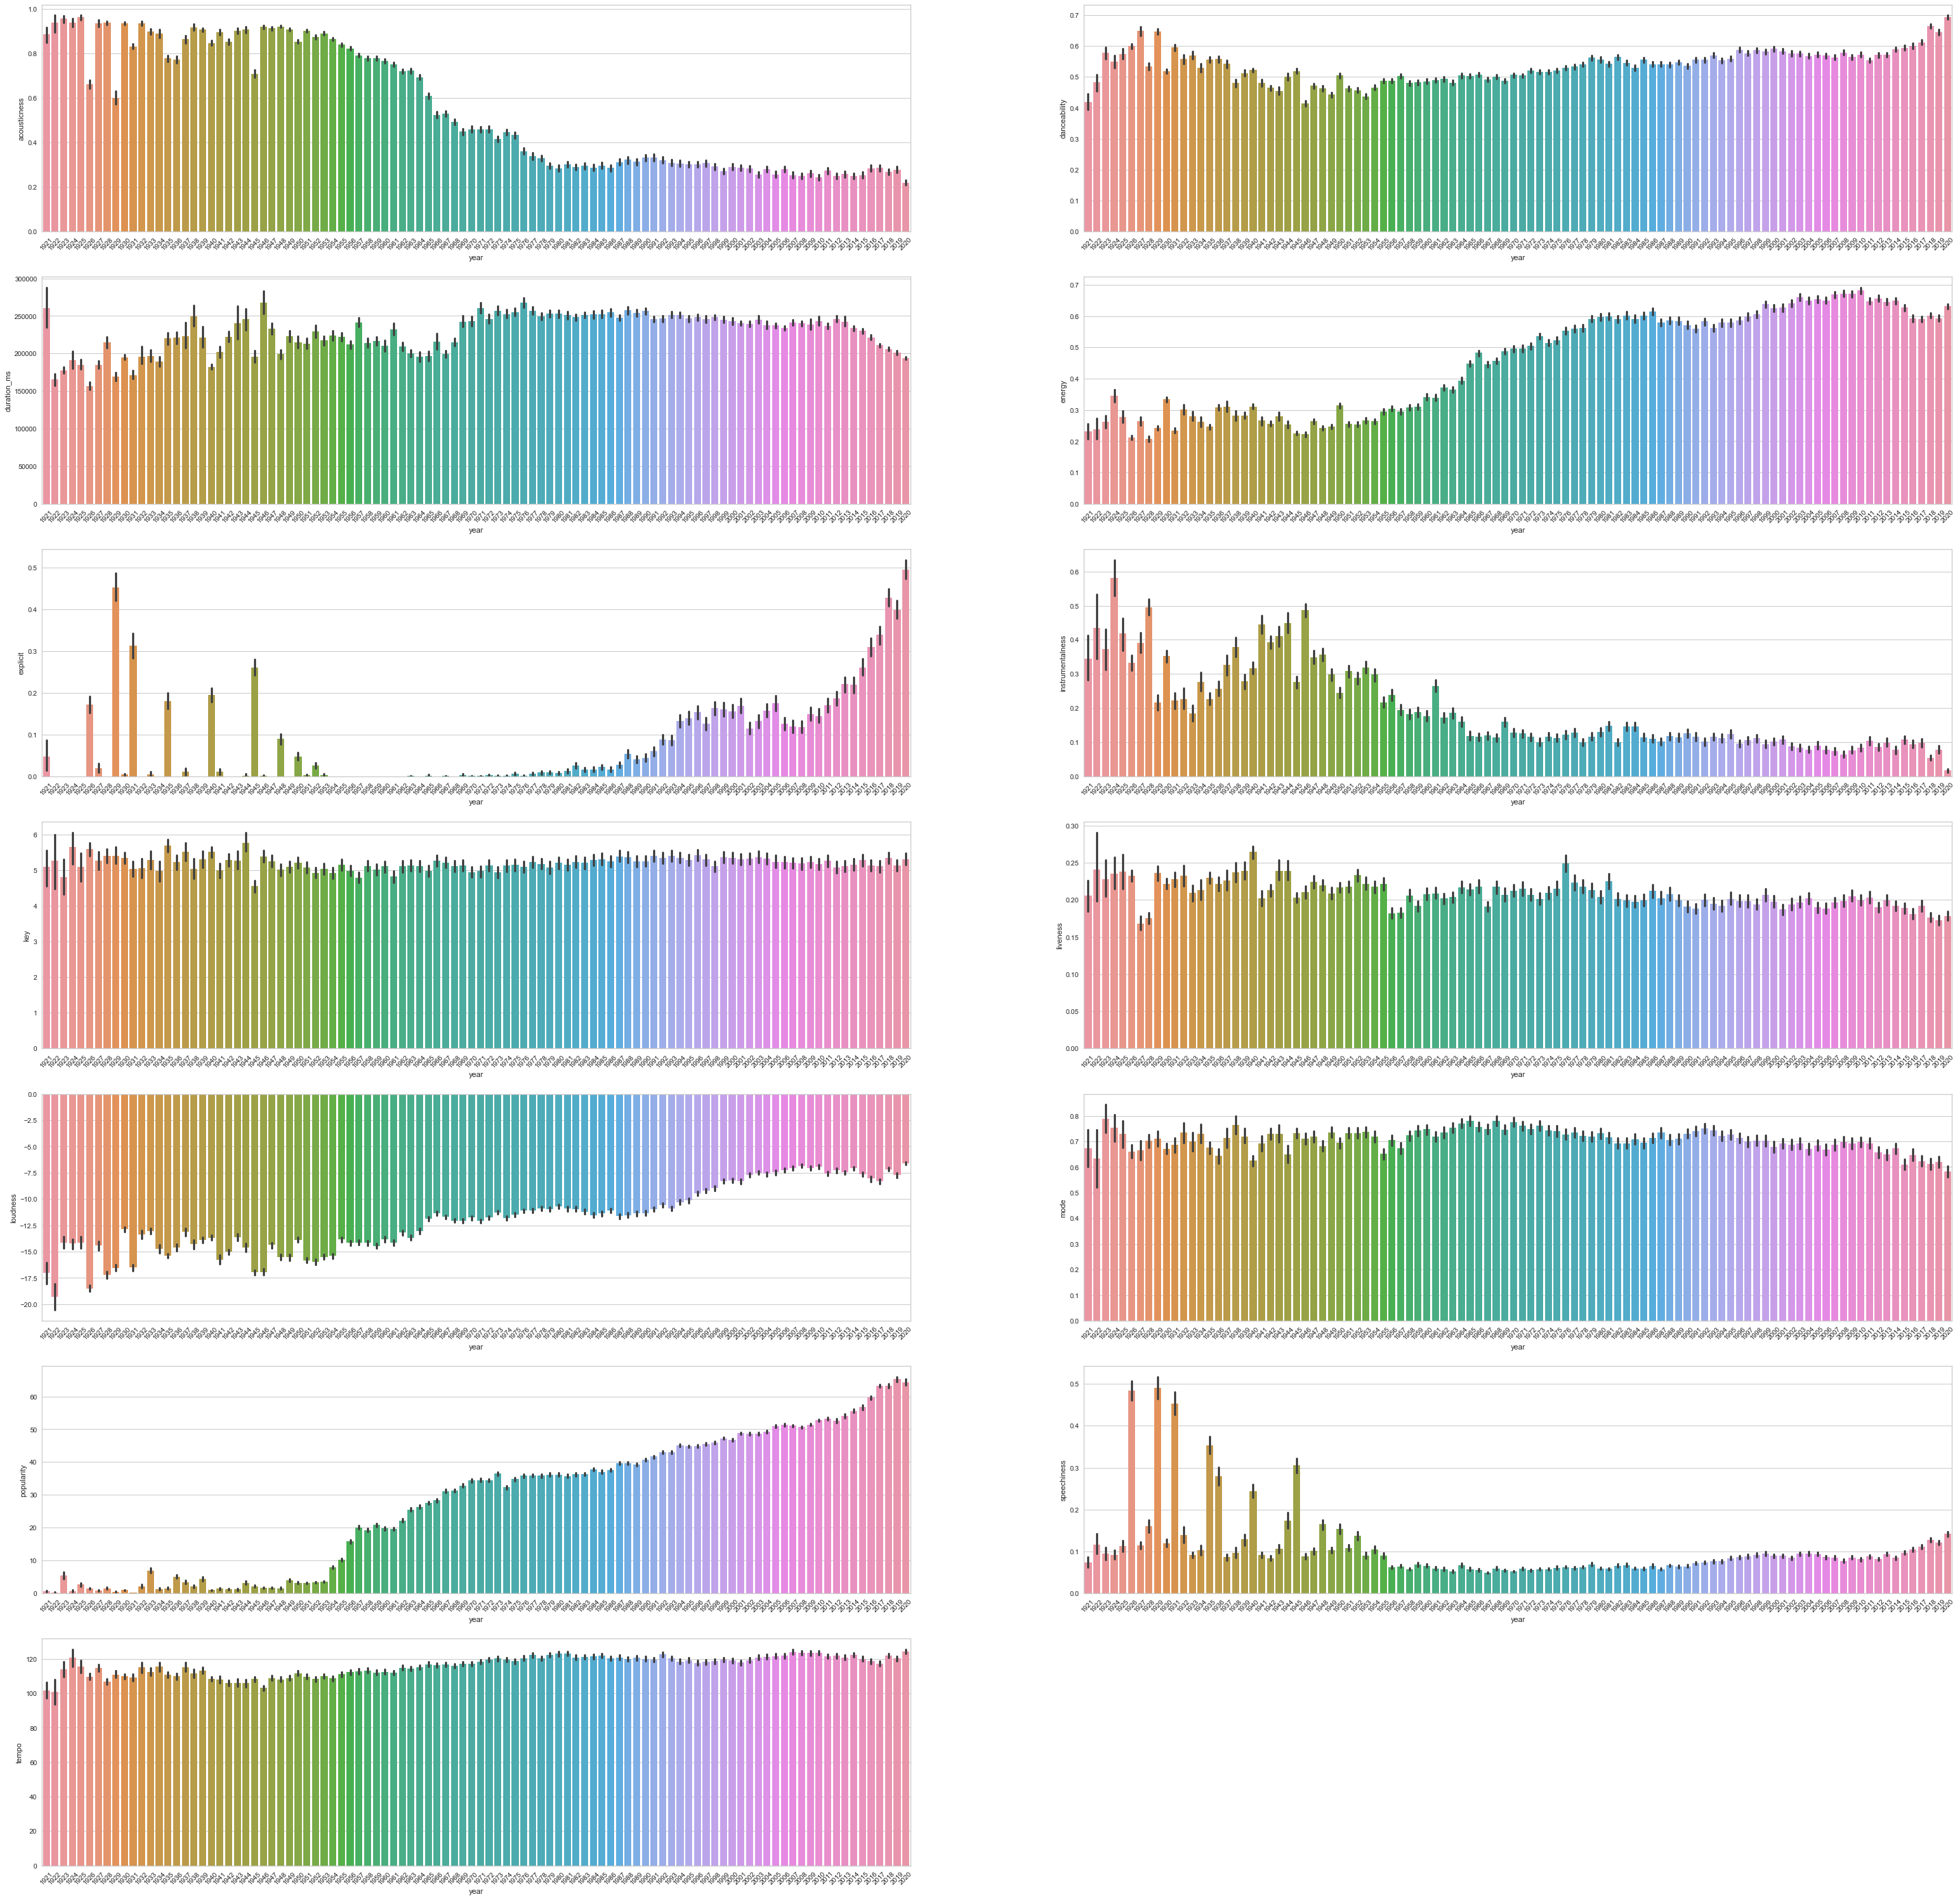

In [13]:
viz_data = data.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])

plt.figure(figsize=(50, 50))
for i in tqdm(np.arange(1, len(viz_data.columns))):
    plt.subplot(7, 2, i)
    sns.barplot(x=data.year,y=viz_data[viz_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

## Pearson Correlation

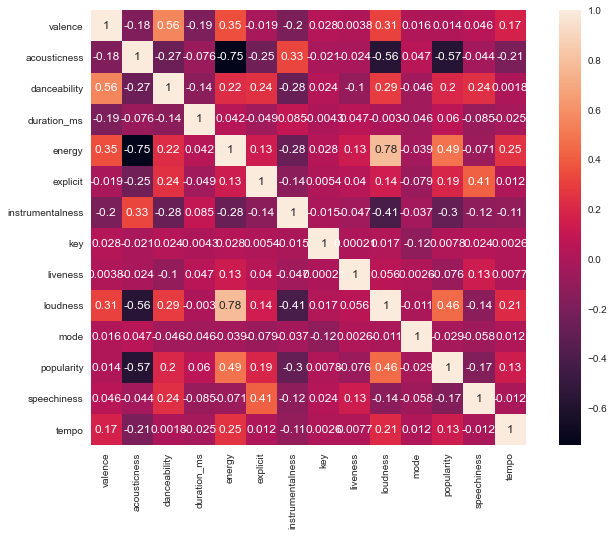

In [14]:
plt.subplots(figsize=(12, 8))
sns.heatmap(viz_data.corr(), annot=True, square=True)
plt.show()

As we will use our data to calculate the distances between the songs and our feature's data veries, we will create a function to normalize it. Now, get all the numerical columns and normalize them.

In [15]:
def normalize_column(col):
    max_d = data[col].max()
    min_d = data[col].min()
    data[col] = (data[col] - min_d)/(max_d - min_d)

In [16]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(col)

In [17]:
data.head(3)

valence  year  acousticness  \
0   0.0594   0.0      0.985944   
1   0.9630   0.0      0.734940   
2   0.0394   0.0      0.964859   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...      0.282389   
1                                     ['Dennis Day']      0.828947   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...      0.331984   

   duration_ms  energy  explicit                      id  instrumentalness  \
0     0.153112   0.211       0.0  4BJqT0PrAfrxzMOxytFOIz             0.878   
1     0.032496   0.341       0.0  7xPhfUan2yNtyFG0cUWkt8             0.000   
2     0.091685   0.166       0.0  1o6I8BglA6ylDMrIELygv1             0.913   

        key  liveness  loudness  mode  \
0  0.909091     0.665  0.624916   1.0   
1  0.636364     0.160  0.744797   1.0   
2  0.272727     0.101  0.707071   1.0   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...        0.04         1921   
1                            Clancy Lowered the Boom        0.05         1921   
2                                          Gati Bali        0.05         1921   

   speechiness     tempo  
0     0.037732  0.332450  
1     0.427835  0.250243  
2     0.034948  0.453125

SONG RECOMMENDATION SYSTEM

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
come = km.fit_predict(num)
data['come'] = come
normalize_column('come')

In [19]:
data.come[:10]

0    0.777778
1    0.000000
2    0.444444
3    0.888889
4    0.000000
5    0.111111
6    0.000000
7    0.888889
8    0.000000
9    0.000000
Name: come, dtype: float64

In [20]:
song =data[data.name=='In the End']
song.head(3)

valence      year  acousticness          artists  danceability  \
15608    0.400  0.797980      0.009618  ['Linkin Park']      0.562753   
15671    0.464  0.797980      0.008373  ['Linkin Park']      0.561741   
52079    0.772  0.737374      0.000058    ['Green Day']      0.326923   

       duration_ms  energy  explicit                      id  \
15608     0.039229   0.864       0.0  60a0Rd6pjrkxjPbaKzXjfq   
15671     0.039214   0.844       0.0  3tSmXSxaAnU1EPGKa6NytH   
52079     0.018763   0.951       0.0  4GSyhhe5HHAytp7KlmWlZX   

       instrumentalness       key  liveness  loudness  mode        name  \
15608          0.000000  0.272727    0.2090  0.847702   0.0  In the End   
15671          0.000000  0.272727    0.0895  0.836786   0.0  In the End   
52079          0.000002  0.090909    0.2330  0.848109   1.0  In the End   

       popularity release_date  speechiness     tempo      come  
15608        0.84   2000-10-24     0.060206  0.431786  0.888889  
15671        0.65   2000-10-24     0.057113  0.432000  0.888889  
52079        0.50   1994-02-01     0.045567  0.573043  0.666667

In [21]:
class SpotifyRecommender():
    def __init__(self, rec_data):
        #our class should understand which data to work with
        self.rec_data_ = rec_data
    #By using the “self” keyword we can access the attributes and methods of the class in python. 
    #It binds the attributes with the given arguments.
    
    #if we need to change data
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    #function which returns recommendations, we can also choose the amount of songs to be recommended
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if col not in [3, 6, 8, 14, 16, 17]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute((float (song [col])) - float( r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['artists', 'name']
        return res_data[columns][:amount]

In [22]:
recommender = SpotifyRecommender(data)

In [23]:
recommender.get_recommendations('In the End' , 5)

100%|████████████████████████████████████████████████████████████████████████| 170647/170647 [00:20<00:00, 8468.67it/s]


artists                        name
35976            ['Linkin Park']              No More Sorrow
15031                   ['Fuel']                     Shimmer
17824                  ['Adele']        Set Fire to the Rain
53734  ['Red Hot Chili Peppers']  Throw Away Your Television
54035              ['Crossfade']                 So Far Away

In [24]:
recommender.get_recommendations('Girls like you', 5)

100%|████████████████████████████████████████████████████████████████████████| 170650/170650 [00:20<00:00, 8268.89it/s]


artists           name
16904                          ['Taylor Swift']     Tim McGraw
74317                             ['BLACKPINK']           STAY
123738                            ['Sam Smith']        Nirvana
36697   ['Garrett Hedlund', 'Leighton Meester']  Give In to Me
37401                        ['Casting Crowns']   Just Be Held

In [26]:
recommender.get_recommendations('Love Story', 5)

100%|████████████████████████████████████████████████████████████████████████| 170648/170648 [00:21<00:00, 7807.48it/s]


artists  \
18212                               ['Cage The Elephant']   
18553                                   ['One Direction']   
36742                                           ['Adele']   
54808   ['High School Musical Cast', 'Vanessa Hudgens'...   
138092                                 ['Gustavo Cerati']   

                                            name  
18212                        Cigarette Daydreams  
18553                         Stockholm Syndrome  
36742                         Don't You Remember  
54808   Right Here, Right Now - Original Version  
138092                                     Adiós

In [27]:
recommender.get_recommendations('Circles', 5)

100%|████████████████████████████████████████████████████████████████████████| 170644/170644 [00:21<00:00, 7884.17it/s]


artists  \
75149                          ['Sigala', 'James Arthur']   
74708   ['Rudimental', 'Jess Glynne', 'Macklemore', 'D...   
124890  ['K/DA', 'TWICE', 'Bekuh Boom', 'Annika Wells'...   
108850                                            ['BTS']   
57378                                    ['Madison Beer']   

                                                     name  
75149                                       Lasting Lover  
74708   These Days (feat. Jess Glynne, Macklemore & Da...  
124890                                      I'LL SHOW YOU  
108850                                          Stay Gold  
57378                                                Baby

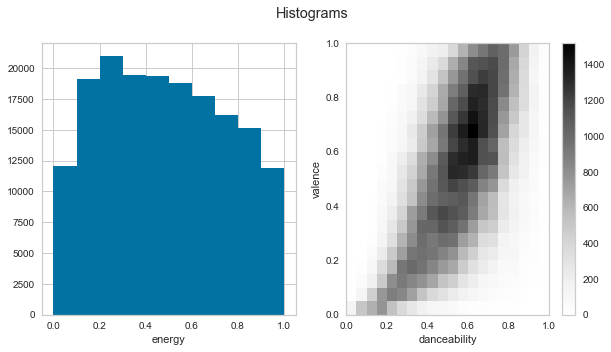

In [28]:
x = "danceability"
y = "valence"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(data[x], data[y], bins=20)
ax1.hist(data["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()


## Visualizing the Clusters with t-SNE

In [29]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

## Characteristics of Different Genres 

In [30]:
top10_genres = genre_data.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=['valence','danceability', 'energy',  'acousticness'], barmode='group')
fig.show()

## Clustering Genres with K-Means

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE


cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10, n_jobs=-1))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=2))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.087s...
[t-SNE] Computed neighbors for 2973 samples in 0.714s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] Computed conditional probabilities in 0.292s
[t-SNE] Iteration 50: error = 81.8169174, gradient norm = 0.0291798 (50 iterations in 2.292s)
[t-SNE] Iteration 100: error = 76.3371124, gradient norm = 0.0039252 (50 iterations in 1.615s)
[t-SNE] Iteration 150: error = 76.1644440, gradient norm = 0.0015428 (50 iterations in 1.512s)
[t-SNE] Iteration 200: error = 76.1263275, gradient norm = 0.0004986 (50 iterations in 1.469s)
[t-SNE] Iteration 250: error = 76.1126938, gradient norm = 0.0008099 (50 iterations in 1.494s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.112694
[t-SNE] Iteration 300: erro

In [35]:
import plotly.graph_objs as go
import plotly.express as px
top50.rename(columns={'Artist.Name':'artist','Beats.Per.Minute': 'BPM', 'Track.Name': 'Title', 'Length.':'Length', 'Acousticness..':'Acousticness', 'Valence.':'Valence', 'Speechiness.':'Speechiness'}, inplace=True)
top50.head()

Unnamed: 0                            Title         artist           Genre  \
0           1                         Se�orita   Shawn Mendes    canadian pop   
1           2                            China       Anuel AA  reggaeton flow   
2           3    boyfriend (with Social House)  Ariana Grande       dance pop   
3           4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4           5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   BPM  Energy  Danceability  Loudness..dB..  Liveness  Valence  Length  \
0  117      55            76              -6         8       75     191   
1  105      81            79              -4         8       61     302   
2  190      80            40              -4        16       70     186   
3   93      65            64              -8         8       55     198   
4  150      65            58              -4        11       18     175   

   Acousticness  Speechiness  Popularity  
0             4            3          79  
1             8            9          92  
2            12           46          85  
3            12           19          86  
4            45            7          94

In [37]:
fig = px.bar(top50, x = 'artist', y='Length', hover_data=['Genre','Title'])
fig.show()

In [39]:
fig = px.scatter(top50, x='BPM', y='Popularity', color='artist', size='Length')
fig.show()

In [40]:
top50.sort_values(by='Length', ascending=False).head(10)

Unnamed: 0                      Title       artist           Genre  BPM  \
22          23       No Me Conoce - Remix  Jhay Cortez  reggaeton flow   92   
1            2                      China     Anuel AA  reggaeton flow  105   
13          14         Otro Trago - Remix         Sech  panamanian pop  176   
23          24            Soltera - Remix        Lunay           latin   92   
15          16  No Guidance (feat. Drake)  Chris Brown       dance pop   93   
10          11                   Callaita    Bad Bunny       reggaeton  176   
16          17                 LA CANCI�N     J Balvin           latin  176   
40          41                Higher Love         Kygo             edm  104   
36          37                 Otro Trago         Sech  panamanian pop  176   
34          35          Never Really Over   Katy Perry       dance pop  100   

    Energy  Danceability  Loudness..dB..  Liveness  Valence  Length  \
22      79            81              -4         9       58     309   
1       81            79              -4         8       61     302   
13      79            73              -2         6       76     288   
23      78            80              -4        44       80     266   
15      45            70              -7        16       14     261   
10      62            61              -5        24       24     251   
16      65            75              -6        11       43     243   
40      68            69              -7        10       40     228   
36      70            75              -5        11       62     226   
34      88            77              -5        32       39     224   

    Acousticness  Speechiness  Popularity  
22            14            7          83  
1              8            9          92  
13             7           20          87  
23            36            4          91  
15            12           15          82  
10            60           31          93  
16            15           32          90  
40             2            3          88  
36            14           34          91  
34            19            6          89

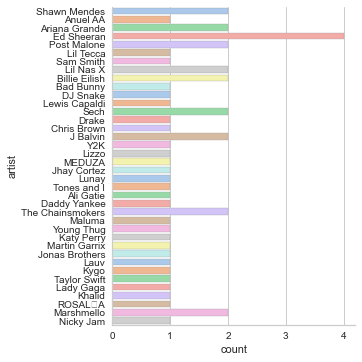

In [44]:
sns.catplot(y = "artist", kind = "count",
            palette = "pastel", edgecolor = ".6",
            data = top50)
plt.show()

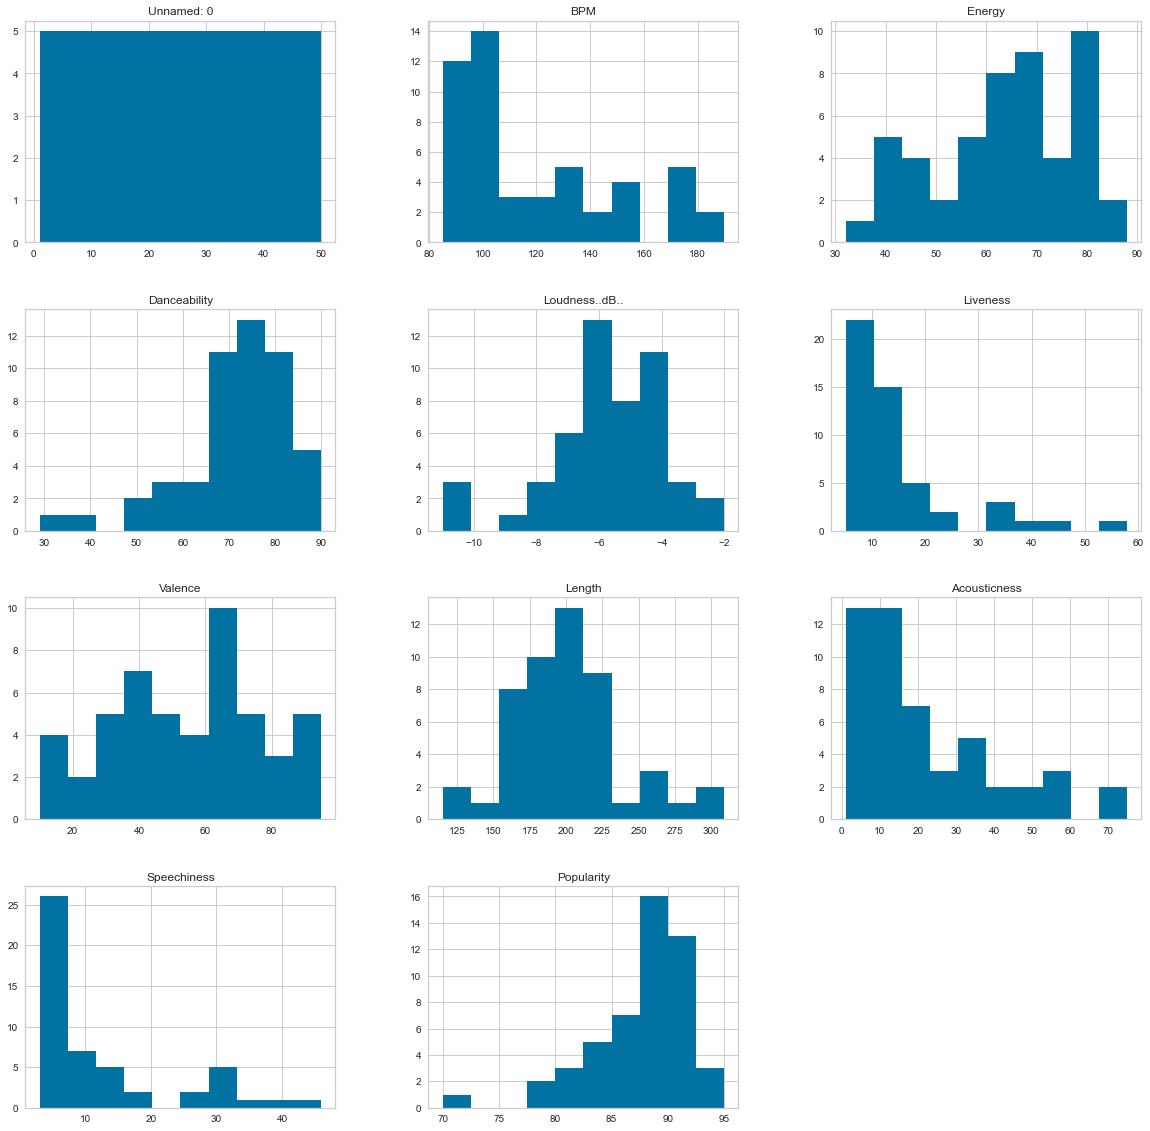

In [45]:
top50.hist (bins=10,figsize=(20,20))
plt.show ()

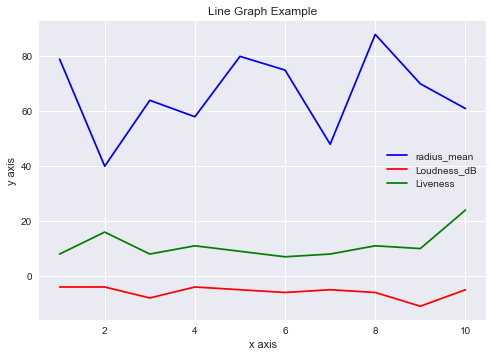

In [47]:
plt.style.use('seaborn')
df1=top50.head(100)
x  = [(i+1) for i in range(10)]
y1 = df1['Danceability'][1:11]
y2 = df1['Loudness..dB..'][1:11]
y3 = df1['Liveness'][1:11] 
plt.plot(x, y1, label="radius_mean", color = 'Blue')
plt.plot(x, y2, label="Loudness_dB", color = 'Red')
plt.plot(x, y3, label="Liveness", color = 'Green')
plt.plot()
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Line Graph Example")
plt.legend()
plt.show()

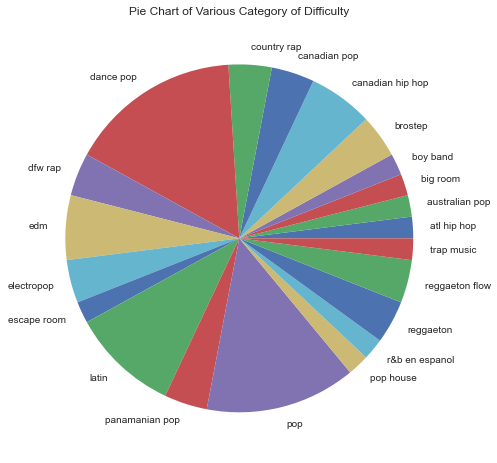

In [48]:
df1=top50.head(100)
df2= df1.groupby('Genre').size()
# Make the plot with pandas
df2.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Various Category of Difficulty")
plt.ylabel("")
plt.show()

# Conclusion: 